Text(0, 0.5, 'Binned Power')

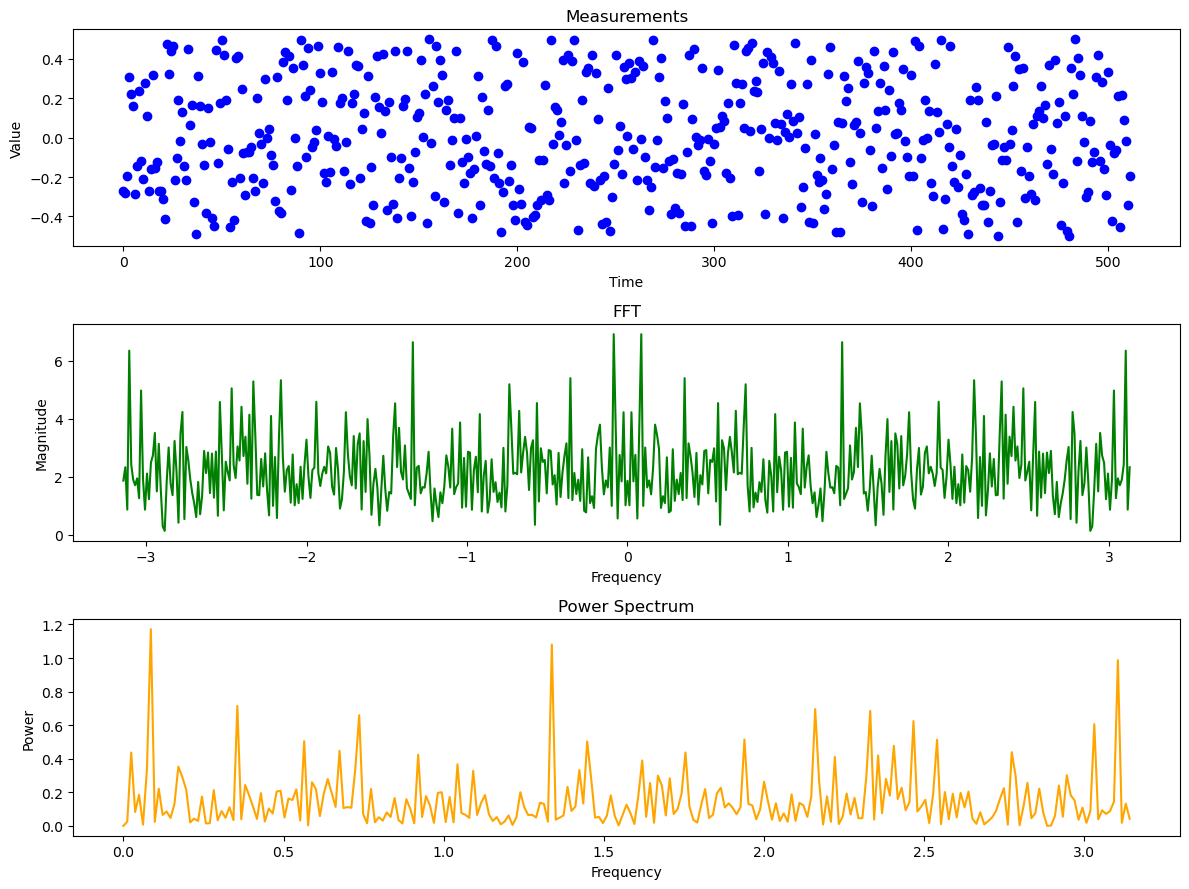

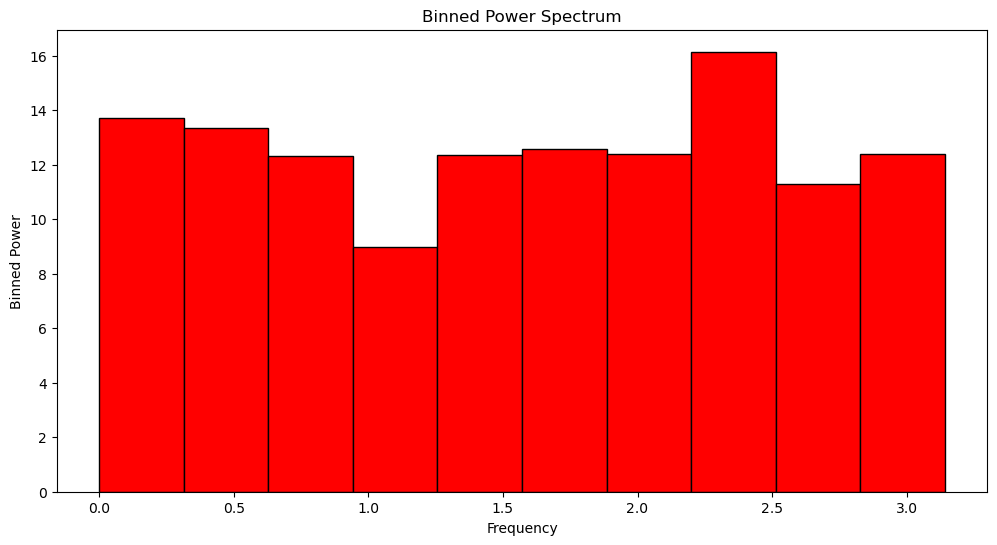

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import cmath

url = 'http://theory.tifr.res.in/~kulkarni/noise.txt'
data = np.loadtxt(url)

N = len(data)
dt = 1
time = np.arange(N) * dt

freq = np.fft.fftfreq(N, dt)
dft = np.fft.fft(data, norm="ortho")

freqs_shifted = np.fft.fftshift(2*np.pi*freq)
dft_shifted = np.fft.fftshift(dft)

dft_modified = np.array([dt * np.sqrt(N / (2 * np.pi)) * cmath.exp(-1j * k_q * time[0]) * dft_shifted[i] for i, k_q in enumerate(freqs_shifted)])

# Plot the measurements
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(time, data, marker='o', linestyle='', color='b')
plt.title('Measurements')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the FFT
plt.subplot(3, 1, 2)
plt.plot(freqs_shifted, np.abs(dft_modified), color='green', label='FFT')
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Compute the power spectrum using the periodogram
frequencies, power_spectrum = periodogram(data, fs=1)
frequencies *= 2*np.pi

plt.subplot(3, 1, 3)
plt.plot(frequencies, power_spectrum, color='orange', label='Power Spectrum')
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

plt.savefig("fig0")

num_bins = 10

linear_bins = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)

binned_power_spectrum, _ = np.histogram(frequencies, bins=linear_bins, weights=power_spectrum)

bin_widths = np.diff(linear_bins)
binned_power_spectrum /= bin_widths

bin_centers = (linear_bins[1:] + linear_bins[:-1]) / 2

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, binned_power_spectrum, width=np.diff(linear_bins), align='center', color='red', edgecolor='black')
plt.title('Binned Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Binned Power')

